# First OpenSeesPy Script: Elastic Model
#### Autor: Orlando Arroyo
#### email: odarroyo@uc.cl
#### based on the example available at: https://opensees.berkeley.edu/wiki/index.php?title=OpenSees_Example_5._2D_Frame,_3-story_3-bay,_Reinforced-Concrete_Section_%26_Steel_W-Section

## CLoading necessary libraries

In [1]:
from openseespy.opensees import *
import opsvis as opsv # You need to call opsvis to plot the model being generated.
import matplotlib.pyplot as plt # This is a standard library for plotting various elements and creating figures.
import opseestools.analisis as an # Analysis library with different options.
import numpy as np # Numpy library for mathematical operations.#tutorial based on the example available at: https://opensees.berkeley.edu/wiki/index.php?title=OpenSees_Example_5._2D_Frame,_3-story_3-bay,_Reinforced-Concrete_Section_%26_Steel_W-Section

## Creation of the model

In [2]:
wipe() # It is good practice to start with a wipe 
model('basic','-ndm',2,'-ndf',3) # Creation of a two-dimensional model with three degrees of freedom per node

## Definition of nodes and supports

<Axes: >

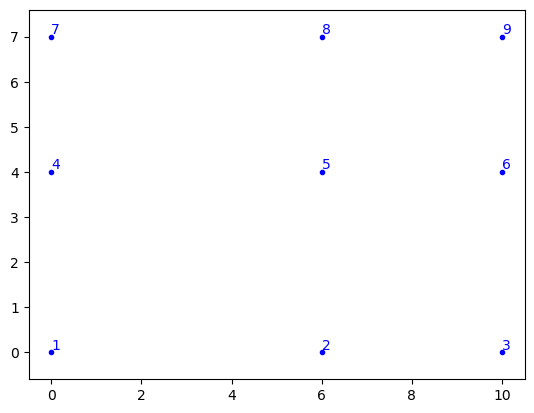

In [3]:
x1 = 6.0
x2 = 10.0
y1 = 4.0
y2 = 7.0

node(1,0.0,0.0) # Definition of node 1 with X and Y coordinates of 0.0 and 0.0
node(2,x1,0.0)
node(3,x2,0.0)
node(4,0.0,y1)
node(5,x1,y1)
node(6,x2,y1)
node(7,0.0,y2)
node(8,x1,y2)
node(9,x2,y2)

# Construction supports
empotrado = [1,1,1] # Restrict degrees of freedom X, Y, Z
grado2 = [1,1,0] # Restrict degrees of freedom X, Y, leaving Z free

fix(1,*empotrado)
fix(2,*empotrado)
fix(3,*grado2)

# Visualization of the nodess
opsv.plot_model()

## Definition of diaphragms and masses

In [4]:
# Diaphragms
equalDOF(4,5,1) # Make the displacement of node 5 in X equal to that of node 4
equalDOF(4,6,1)
equalDOF(7,8,1) 
equalDOF(7,9,1)

# Masses
mass(4,1,1,0) # Assignment of masses in X and Y to node 4
mass(5,1,1,0)
mass(6,1,1,0)
mass(7,1,1,0)
mass(8,1,1,0)
mass(9,1,1,0)

## Definition of materials

In [5]:
E = 24000000 # 24 GPa converted to KPa to make it consistent with the model units
uniaxialMaterial('Elastic',1,E) # Material 1 will be elastic with a modulus of elasticity E

## Definition of elements

<Axes: >

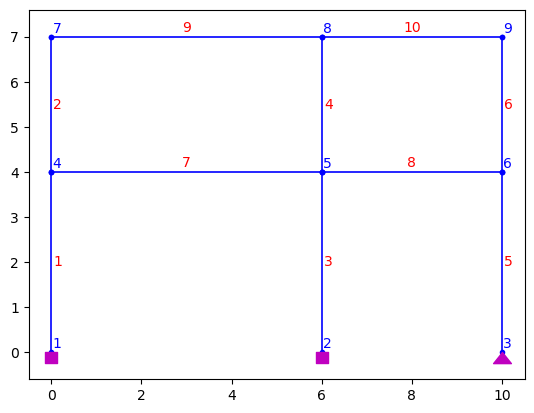

In [6]:
# Transformations of the elements
lineal = 1
geomTransf('Linear',lineal) # Linear transformation

pdelta = 2
geomTransf('PDelta',pdelta) # PDelta transformation

# Dimensions and properties of the linear elements
b = 0.3
h = 0.3
A = b*h
I = b*h**3/12

# Columns
element('elasticBeamColumn',1,1,4,A,E,I,lineal) # Element 1 will go from node 1 to node 4 and will have properties A, E, I, and a linear transformation
element('elasticBeamColumn',2,4,7,A,E,I,lineal)

element('elasticBeamColumn',3,2,5,A,E,I,lineal)
element('elasticBeamColumn',4,5,8,A,E,I,lineal)

element('elasticBeamColumn',5,3,6,A,E,I,lineal)
element('elasticBeamColumn',6,6,9,A,E,I,lineal)

# Vigas
element('elasticBeamColumn',7,4,5,A,E,I,lineal)
element('elasticBeamColumn',8,5,6,A,E,I,lineal)

element('elasticBeamColumn',9,7,8,A,E,I,lineal)
element('elasticBeamColumn',10,8,9,A,E,I,lineal)

# To visualize the model
opsv.plot_model()

## Loads of the model

In [7]:
timeSeries('Linear', 1)
pattern('Plain',1,1)

# The load command assigns a point load to a node in the X, Y, and Z degrees of freedom
# There are two ways to assign them

# Method 1:
load(4,5.0,0.0,0.0)

# Method 2:
carga7 = [10.0, 0.0, 0.0]
load(7,*carga7)

# The eleload command assigns a load to the element:
vigas = [7,8,9,10] # Tags of the beam elements
wviga = 20 # Distributed load on the beam
eleLoad('-ele',*vigas,'-type','beamUniform',-wviga) # Application of the load on the beam

## Calculation of eigenvalues and mode shapes

The fundamental period is:  0.2539171248294939


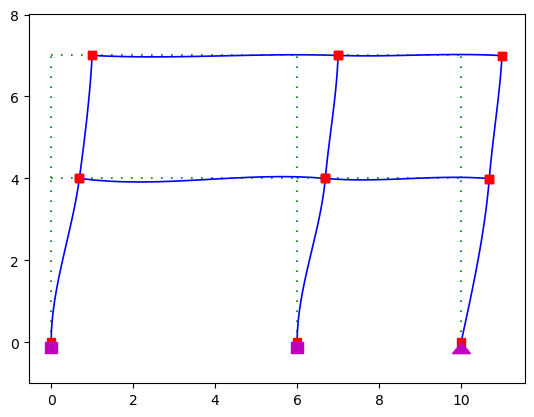

In [8]:
eig= eigen(1) # The eigen command calculates the frequencies of the specified number of modes. In this case, 1
T1 = 2*3.1416/np.sqrt(eig[0]) # The corresponding period is obtained
print('The fundamental period is: ',T1) # The result is printed

# Visualization of the first mode shape
opsv.plot_mode_shape(1)

## Model analysis and representation of the deformed shape

158.44239705831825

<Figure size 640x480 with 0 Axes>

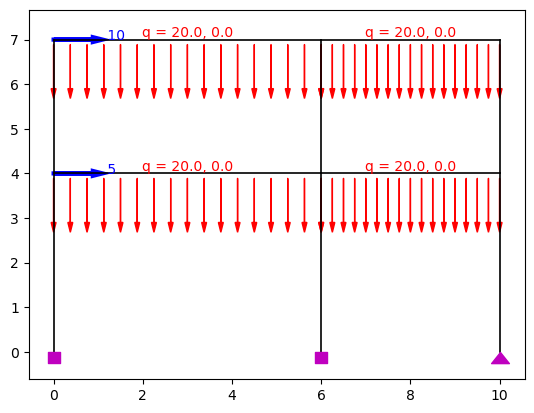

<Figure size 640x480 with 0 Axes>

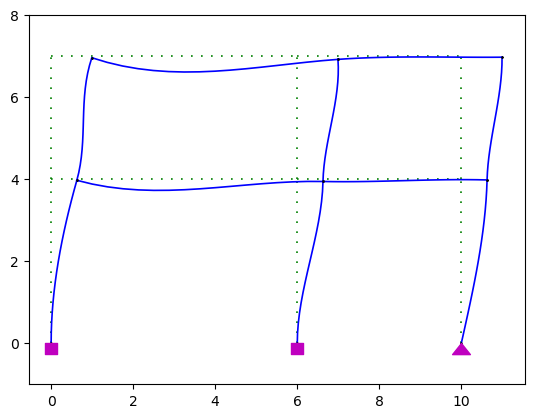

In [9]:
# The analysis library that was called is used

an.gravedad()

# Representation of the model with loads
plt.figure()
opsv.plot_loads_2d()

# Representation of the deformed shape
plt.figure()
opsv.plot_defo()

## Obtaining responses of nodes and elements

##### Response of the nodes

In [10]:
# Displacement of node 9 in X is:
ux9 = nodeDisp(9,1)
print('The displacement of node 9 in X is ', ux9)

The displacement of node 9 in X is  0.006260081199071993


##### Response of the elements

In [11]:
# Forces of column 1
fcol1 = eleResponse(9,'globalForce')
print('The forces in column 1 are ', fcol1)

# The forces will always correspond to the degrees of freedom. In this case, they are the three at the initial node and the three at the final node

The forces in column 1 are  [0.0, 55.71651128762708, 40.15669362896621, 0.0, 64.28348871237289, -65.85762590320364]
